In [314]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import re
import pyproj

In [315]:
data = pd.read_excel("homicidios.xlsx")

In [316]:
data.shape
data.head()


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [310]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

In [317]:
data.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

# 4.1 Datos faltantes

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 696. Sin embargo columnas como "altura", "cruce", "calle" y "direccion_normalizada" les faltan unos datos. 

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes: "cruce", "calle" y "direccion_normalizada", la columna altura  se llenara con valor 0.
EXisten valores "SD" en las columnas "ACUSADO" Y "VICTIMA" se eliminara del DF.


In [318]:
data.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

In [320]:
data.dropna(subset=['Calle', 'Cruce', "Dirección Normalizada"], inplace=True)


In [321]:
# Filtrar los registros donde 'VICTIMA' o 'ACUSADO' tengan valor 'SD'
filtered_data = data.loc[(data['VICTIMA'] != 'SD') & (data['ACUSADO'] != 'SD')]


In [322]:
data = data.loc[(data['VICTIMA'] != 'SD') & (data['ACUSADO'] != 'SD')]

In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 693
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     506 non-null    object        
 1   N_VICTIMAS             506 non-null    int64         
 2   FECHA                  506 non-null    datetime64[ns]
 3   AAAA                   506 non-null    int64         
 4   MM                     506 non-null    int64         
 5   DD                     506 non-null    int64         
 6   HORA                   506 non-null    object        
 7   HH                     506 non-null    object        
 8   LUGAR_DEL_HECHO        506 non-null    object        
 9   TIPO_DE_CALLE          506 non-null    object        
 10  Calle                  506 non-null    object        
 11  Altura                 0 non-null      float64       
 12  Cruce                  506 non-null    object        
 13  Dirección 

Se elimina la columna altura porque al hacer el drop, esta columna queda sin datos 

In [324]:
# Eliminar la columna 'Altura' si no contiene valores válidos
data = data.drop(columns=['Altura'])

# 4.2 Columnas irrelevantes
En este caso no contamos con columnas categoricas y numéricas  de un solo nivel, sin embargo,  se cuenta con columnas con informacion  reduntante, tenemos una columna fecha, otras columnas que separan la fecha por columnas año, mes, y dia. Ademas contamos con la columna hora que tiene el formato 00:00 y hh con forato 00. Se cuenta con "cruce" y "Direccion Normalizada" que contienen los mismos datos. 
Eliminare estas columnas por que para efectos del analisis si necesito el lugar de mas accidentalidad podre usar las columnas "Lugar del hecho" y "Tipo de Calle".
Tengo dudas aún de la funcionalidad de las columnas, si pueden ser relevante o no,  las voy a dejar (y más adelante en posteriores etapas podre darme cuenta de si se debe preservar o no).


In [325]:
data.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 693
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     506 non-null    object        
 1   N_VICTIMAS             506 non-null    int64         
 2   FECHA                  506 non-null    datetime64[ns]
 3   AAAA                   506 non-null    int64         
 4   MM                     506 non-null    int64         
 5   DD                     506 non-null    int64         
 6   HORA                   506 non-null    object        
 7   HH                     506 non-null    object        
 8   LUGAR_DEL_HECHO        506 non-null    object        
 9   TIPO_DE_CALLE          506 non-null    object        
 10  Calle                  506 non-null    object        
 11  Cruce                  506 non-null    object        
 12  Dirección Normalizada  506 non-null    object        
 13  COMUNA    

In [327]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['ID', 'HORA', 'HH', 'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Dirección Normalizada', 'XY (CABA)', 'pos x', 'pos y','PARTICIPANTES', 'VICTIMA', 'ACUSADO'  ]

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna ID: 506 subniveles
Columna HORA: 299 subniveles
Columna HH: 25 subniveles
Columna LUGAR_DEL_HECHO: 495 subniveles
Columna TIPO_DE_CALLE: 4 subniveles
Columna Dirección Normalizada: 465 subniveles
Columna XY (CABA): 440 subniveles
Columna pos x: 440 subniveles
Columna pos y: 440 subniveles
Columna PARTICIPANTES: 31 subniveles
Columna VICTIMA: 9 subniveles
Columna ACUSADO: 9 subniveles


Todas las columnas categóricas tienen más de 1 subnivel. Se eliminaran las columnas "Calle" "Cruce" y "Dirección Normalizada"

Verifiquemos lo que ocurre con las columnas numéricas: pero antes voy a cambiar de tipo de dato a las columnas HORA, HH, POS X, POS Y

In [328]:
data = data.drop(columns=["Cruce"])

In [329]:
data = data.drop(columns=["Calle"])

In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 693
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     506 non-null    object        
 1   N_VICTIMAS             506 non-null    int64         
 2   FECHA                  506 non-null    datetime64[ns]
 3   AAAA                   506 non-null    int64         
 4   MM                     506 non-null    int64         
 5   DD                     506 non-null    int64         
 6   HORA                   506 non-null    object        
 7   HH                     506 non-null    object        
 8   LUGAR_DEL_HECHO        506 non-null    object        
 9   TIPO_DE_CALLE          506 non-null    object        
 10  Dirección Normalizada  506 non-null    object        
 11  COMUNA                 506 non-null    int64         
 12  XY (CABA)              506 non-null    object        
 13  pos x     

In [331]:
# Filtrar filas donde los valores de 'HORA' o 'HH' son 'SD'
filas_sd = data[(data['HORA'] == 'SD') | (data['HH'] == 'SD')]

# Mostrar las filas con 'SD' en las columnas 'HORA' o 'HH'
print(filas_sd[['HORA', 'HH']])

    HORA  HH
518   SD  SD


In [332]:
# Eliminar la fila donde tanto 'HORA' como 'HH' son 'SD'
data = data[~((data['HORA'] == 'SD') & (data['HH'] == 'SD'))]

In [333]:
print(data[(data['HORA'] == 'SD') & (data['HH'] == 'SD')])

Empty DataFrame
Columns: [ID, N_VICTIMAS, FECHA, AAAA, MM, DD, HORA, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, Dirección Normalizada, COMUNA, XY (CABA), pos x, pos y, PARTICIPANTES, VICTIMA, ACUSADO]
Index: []


In [334]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 0 to 693
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     505 non-null    object        
 1   N_VICTIMAS             505 non-null    int64         
 2   FECHA                  505 non-null    datetime64[ns]
 3   AAAA                   505 non-null    int64         
 4   MM                     505 non-null    int64         
 5   DD                     505 non-null    int64         
 6   HORA                   505 non-null    object        
 7   HH                     505 non-null    object        
 8   LUGAR_DEL_HECHO        505 non-null    object        
 9   TIPO_DE_CALLE          505 non-null    object        
 10  Dirección Normalizada  505 non-null    object        
 11  COMUNA                 505 non-null    int64         
 12  XY (CABA)              505 non-null    object        
 13  pos x     

In [335]:
# Convertir la columna HORA a string (incluyendo NaN, los cuales se convertirán en 'nan')
data['HORA'] = data['HORA'].astype(str)

In [336]:
# Verificar los valores que no coinciden con el formato 'HH:MM:SS'
invalid_values = data['HORA'][data['HORA'].str.match(r'^\d{2}:\d{2}:\d{2}$') == False]

In [337]:
print(invalid_values)

496    1900-01-04 18:40:00
Name: HORA, dtype: object


In [338]:
# Intentar convertir la columna 'HORA' a hora (sin la parte de la fecha)
data['HORA'] = pd.to_datetime(data['HORA'], format='%H:%M:%S', errors='coerce').dt.time

# Verificar los resultados
print(data['HORA'].head(10))


0     04:00:00
1     01:15:00
4     05:20:00
5     18:30:00
6     19:10:00
7     15:20:00
8     01:20:00
10    05:14:00
11    22:00:00
12    16:54:00
Name: HORA, dtype: object


In [339]:
# Reemplazar los valores NaT (Not a Time) con '00:00:00'
data['HORA'] = data['HORA'].fillna('00:00:00')

# Verificar nuevamente los resultados
print(data['HORA'].head(10))

0     04:00:00
1     01:15:00
4     05:20:00
5     18:30:00
6     19:10:00
7     15:20:00
8     01:20:00
10    05:14:00
11    22:00:00
12    16:54:00
Name: HORA, dtype: object


In [340]:
# Verificar los valores que no coinciden con el formato 'HH:MM:SS'
invalid_values = data['HORA'][data['HORA'].apply(lambda x: isinstance(x, str) and not re.match(r'^\d{2}:\d{2}:\d{2}$', x))]

print("Valores no válidos en la columna 'HORA':")
print(invalid_values)

Valores no válidos en la columna 'HORA':
Series([], Name: HORA, dtype: object)


In [341]:
print(data['HORA'].head())

0    04:00:00
1    01:15:00
4    05:20:00
5    18:30:00
6    19:10:00
Name: HORA, dtype: object


In [342]:
# Verificar los tipos de datos de los valores en la columna 'HORA'
print(data['HORA'].apply(type).value_counts())

HORA
<class 'datetime.time'>    504
<class 'str'>                1
Name: count, dtype: int64


In [343]:
# Verificar el valor específico que no fue convertido correctamente
print(data[data['HORA'].apply(type) == str]['HORA'])


496    00:00:00
Name: HORA, dtype: object


In [344]:
# Eliminar la fila con el valor '00:00:00' en la columna 'HORA'
data = data[data['HORA'] != '00:00:00']

# Verificar que la fila se haya eliminado
print(data['HORA'].apply(type).value_counts())

HORA
<class 'datetime.time'>    504
Name: count, dtype: int64


In [345]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 0 to 693
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     504 non-null    object        
 1   N_VICTIMAS             504 non-null    int64         
 2   FECHA                  504 non-null    datetime64[ns]
 3   AAAA                   504 non-null    int64         
 4   MM                     504 non-null    int64         
 5   DD                     504 non-null    int64         
 6   HORA                   504 non-null    object        
 7   HH                     504 non-null    object        
 8   LUGAR_DEL_HECHO        504 non-null    object        
 9   TIPO_DE_CALLE          504 non-null    object        
 10  Dirección Normalizada  504 non-null    object        
 11  COMUNA                 504 non-null    int64         
 12  XY (CABA)              504 non-null    object        
 13  pos x     

In [346]:
# Convertir la columna de object a numericas 
data['HH'] = data['HH'].astype('int')

In [347]:
# Convertir la columna de object a numericas 
data['pos x'] = pd.to_numeric(data['pos x'], errors='coerce')
data['pos y'] = pd.to_numeric(data['pos y'], errors='coerce')


In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 0 to 693
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     504 non-null    object        
 1   N_VICTIMAS             504 non-null    int64         
 2   FECHA                  504 non-null    datetime64[ns]
 3   AAAA                   504 non-null    int64         
 4   MM                     504 non-null    int64         
 5   DD                     504 non-null    int64         
 6   HORA                   504 non-null    object        
 7   HH                     504 non-null    int64         
 8   LUGAR_DEL_HECHO        504 non-null    object        
 9   TIPO_DE_CALLE          504 non-null    object        
 10  Dirección Normalizada  504 non-null    object        
 11  COMUNA                 504 non-null    int64         
 12  XY (CABA)              504 non-null    object        
 13  pos x     

Una vez con las columnas convertidas a numericas debido a su naturaleza, se procede a su revisión

In [349]:
data.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,COMUNA,pos x,pos y
count,504.000000,504,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,1.029762,2018-09-01 19:48:34.285714176,2018.160714,6.607143,16.192460,11.771825,7.438492,-58.441261,-34.619358
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.000000,1.000000,-58.529942,-34.705250
25%,1.000000,2017-04-17 12:00:00,2017.000000,3.000000,9.000000,6.000000,4.000000,-58.474718,-34.643918
50%,1.000000,2018-06-28 12:00:00,2018.000000,7.000000,16.000000,11.000000,8.000000,-58.444513,-34.621569
75%,1.000000,2019-12-18 00:00:00,2019.000000,10.000000,23.250000,18.000000,11.000000,-58.403634,-34.597180
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,23.000000,15.000000,-58.356082,-34.534654
std,0.181410,NaN,1.663538,3.572096,8.689054,6.855330,4.391862,0.045256,0.035866


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas y datos de tiempo

# 4.3 Filas repetidas

In [350]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (504, 18)
Tamaño del set después de eliminar las filas repetidas: (504, 18)


# 4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

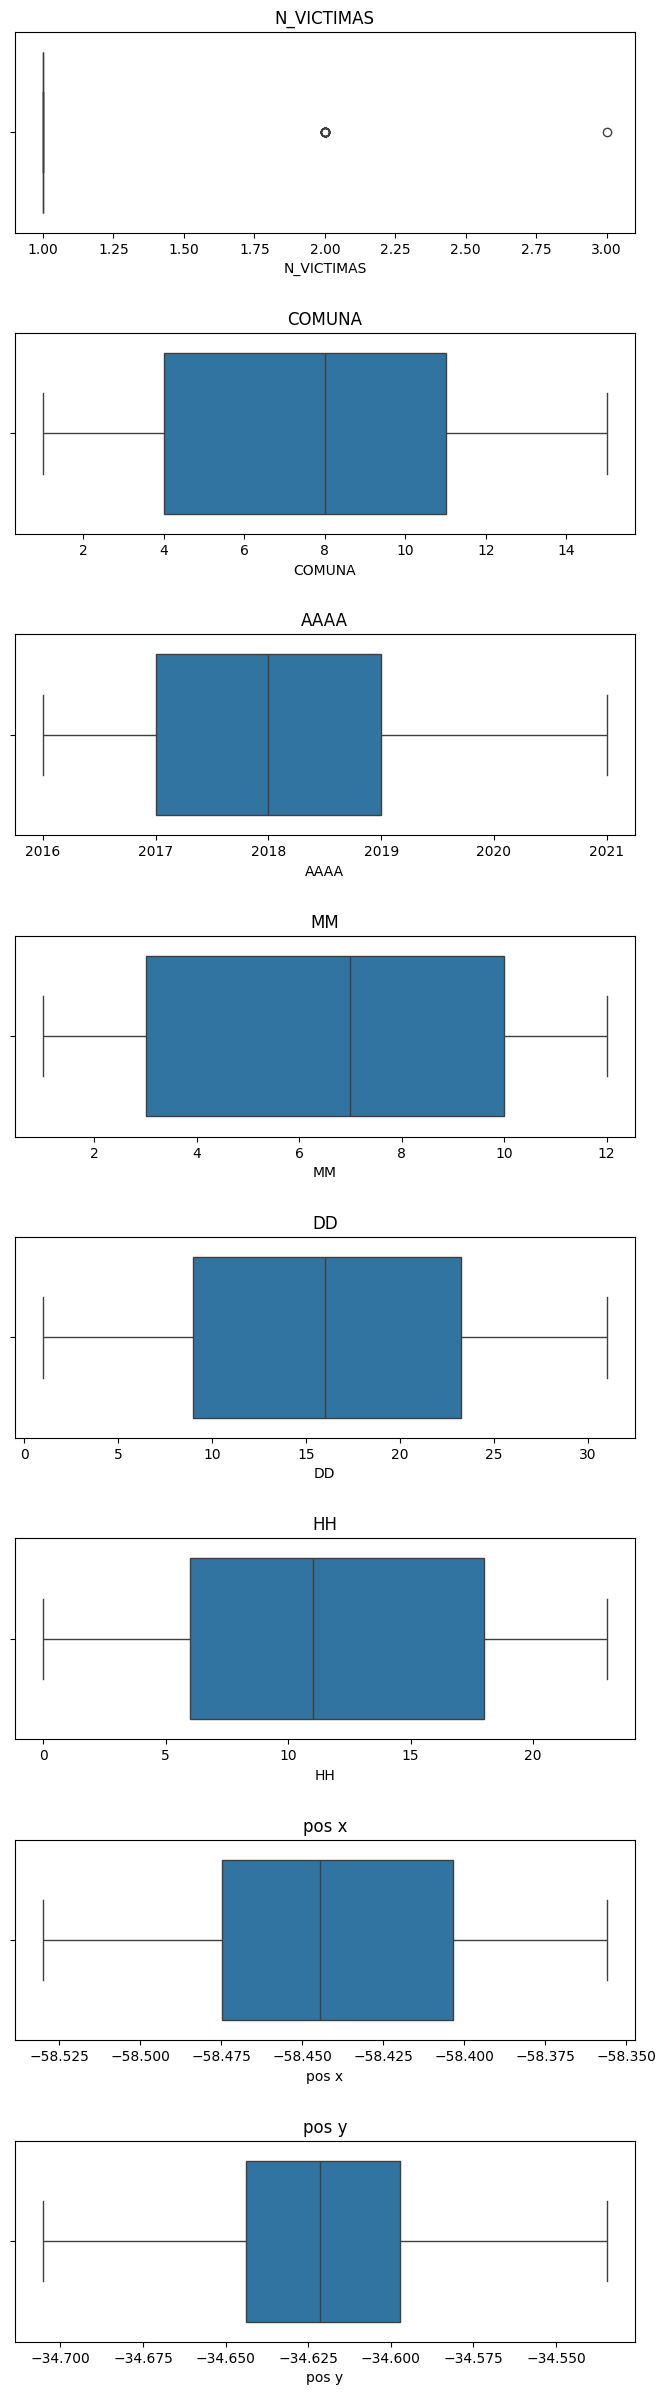

In [351]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['N_VICTIMAS', 'COMUNA', 'AAAA', 'MM', 'DD',
            'HH', 'pos x', 'pos y']

fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

**Observaciones:**
- "N_VICTIMAS ": En accidentes de transito hubo mas de 1 muerto hasta 3 lo que es factible por lo que no se modificara la columna 
- Las demas columnas no tienen outliers 

# 4.5 Errores tipográficos en variables categóricas
En una variable categórica pueden aparecer sub-niveles que no corresponden abreviaturas, no abreviados o mal escritos que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.
Teniendo en cuenta las columnas categóricas que tenemos y sus subniveles; hay columnas con mas de 238 subniveles, serian complejo verlos en una gráfica, por lo tanto graficaremos los que se podrian unificar y modificar.

Se deben unificar estos sub-niveles

In [353]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['ID', 'HORA', 'HH', 'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Dirección Normalizada',
      'XY (CABA)', 'pos x', 'pos y','PARTICIPANTES', 'VICTIMA', 'ACUSADO'  ]

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna ID: 504 subniveles
Columna HORA: 264 subniveles
Columna HH: 24 subniveles
Columna LUGAR_DEL_HECHO: 493 subniveles
Columna TIPO_DE_CALLE: 4 subniveles
Columna Dirección Normalizada: 463 subniveles
Columna XY (CABA): 439 subniveles
Columna pos x: 439 subniveles
Columna pos y: 439 subniveles
Columna PARTICIPANTES: 31 subniveles
Columna VICTIMA: 9 subniveles
Columna ACUSADO: 9 subniveles


Para graficar las columnas categóricas se exime "LUGAR_DEL_HECHO" por la cantidad de subniveles

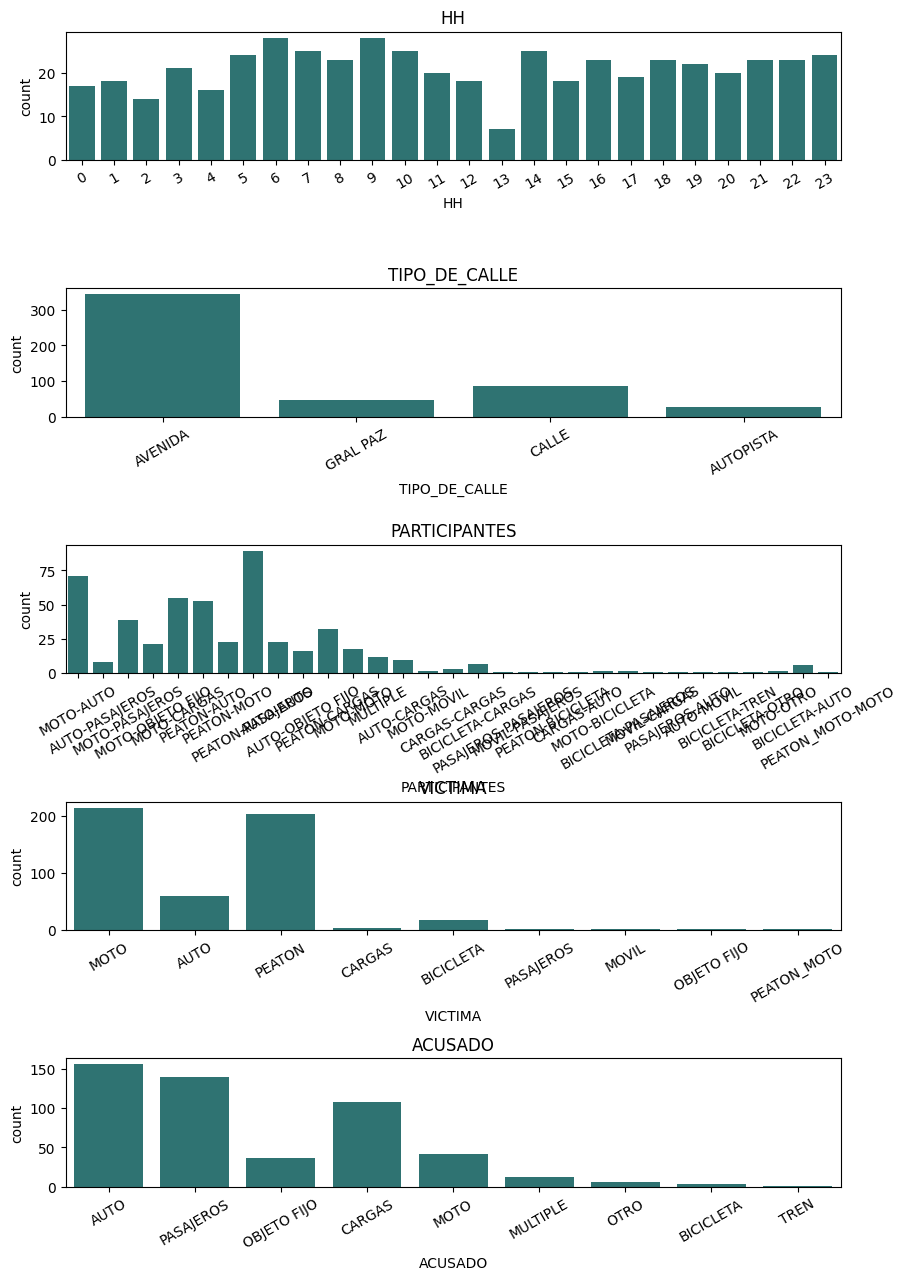

In [369]:
cols_cat = ['HH', 'TIPO_DE_CALLE', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO']
colors = ["#2f7372"]

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10, 15)) 
fig.subplots_adjust(hspace=1)
for i, col in enumerate(cols_cat):
    plot = sns.countplot(x=col, data=data, ax=ax[i])  
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', rotation=30) 
    
    # Asignar colores a las barras
    for j, bar in enumerate(plot.patches):
        bar.set_facecolor(colors[j % len(colors)]) 

# Mostrar gráfico
plt.show()


Al parecer los subniveles estan bien escritos, no hay subniveles repetidos vamos a revisar un poco mas la columna "PARTICIPANTES" vamos a visualizarla mejor. 

In [355]:
# "PARTICIPANTE" revision de subcategorias
print(data['PARTICIPANTES'].unique())

['MOTO-AUTO' 'AUTO-PASAJEROS' 'MOTO-PASAJEROS' 'MOTO-OBJETO FIJO'
 'MOTO-CARGAS' 'PEATON-AUTO' 'PEATON-MOTO' 'PEATON-PASAJEROS' 'AUTO-AUTO'
 'AUTO-OBJETO FIJO' 'PEATON-CARGAS' 'MOTO-MOTO' 'MULTIPLE' 'AUTO-CARGAS'
 'MOTO-MOVIL' 'CARGAS-CARGAS' 'BICICLETA-CARGAS' 'PASAJEROS-PASAJEROS'
 'MOVIL-PASAJEROS' 'PEATON-BICICLETA' 'CARGAS-AUTO' 'MOTO-BICICLETA'
 'BICICLETA-PASAJEROS' 'MOVIL-CARGAS' 'PASAJEROS-AUTO' 'AUTO-MOVIL'
 'BICICLETA-TREN' 'BICICLETA-OTRO' 'MOTO-OTRO' 'BICICLETA-AUTO'
 'PEATON_MOTO-MOTO']


Al parcer la columna "PARTICIPANTES" no tiene subcaterias para agrupar son únicas.

In [356]:
data.shape

(504, 18)

Ajuste de columnas "XY (CABA)" 

In [357]:
data["XY (CABA)"].isnull().sum()

0

In [358]:


# Función para extraer coordenadas (dos números decimales) de un texto
def extraer_coordenadas(texto):
    # Busca todos los números decimales en el texto
    coordenadas = re.findall(r'\d+\.\d+', texto)
    
    # Si encontramos al menos dos coordenadas
    if len(coordenadas) == 2:
        # Convertimos las dos primeras coordenadas a float y las retornamos
        return float(coordenadas[0]), float(coordenadas[1])
    else:
        return None, None
    
    # Si no se encuentran coordenadas o hay menos de dos, retorna None
    return None

# Aplicamos la función a la columna 'XY CABA' con el método .map()
data['Coordenadas_x'], data['Coordenadas_y'] = zip(*data["XY (CABA)"].map(extraer_coordenadas))

data = data[(data['Coordenadas_x'].notnull()) & (data['Coordenadas_y'].notnull())]




In [359]:
data.head(8)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Coordenadas_x,Coordenadas_y
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,98896.782384,93532.434378
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,95832.055711,95505.416420
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,106980.328279,100752.169158
5,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,27 DE FEBRERO AV. y ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.444513,-34.684759,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,101721.590022,93844.256566
6,2016-0009,1,2016-01-24,2016,1,24,19:10:00,19,NOGOYA Y JOAQUIN V. GONZALES,CALLE,"NOGOYA y GONZALEZ, JOAQUIN V.",11,Point (96545.87592078 102330.67262199),-58.500959,-34.608254,MOTO-AUTO,MOTO,AUTO,96545.875921,102330.672622
7,2016-0010,1,2016-01-29,2016,1,29,15:20:00,15,AV GENERAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,MOTO-AUTO,MOTO,AUTO,95832.055711,95505.416420
8,2016-0012,1,2016-02-08,2016,2,8,01:20:00,1,AV BELGRANO Y BERNARDO DE IRIGOYEN,AVENIDA,"BELGRANO AV. e IRIGOYEN, BERNARDO DE",1,Point (107595.35084333 101797.50052813),-58.380486,-34.613039,MOTO-CARGAS,MOTO,CARGAS,107595.350843,101797.500528
10,2016-0015,1,2016-02-14,2016,2,14,05:14:00,5,AV SCALABRINI ORTIZ Y VERA,AVENIDA,"SCALABRINI ORTIZ, RAUL AV. y VERA",15,Point (102357.43746828 103343.52002839),-58.437600,-34.599128,PEATON-AUTO,PEATON,AUTO,102357.437468,103343.520028


Se intentara trasnformar las columnas 'Coordenadas_x' y 'Coordenadas_y' al fomato de hemisferio sur 

In [360]:

# Crear el transformador de UTM (EPSG:32721, UTM zona 21S) a WGS84 (EPSG:4326)
proyector = pyproj.Transformer.from_crs("epsg:32721", "epsg:4326", always_xy=True)

# Definir una función para convertir coordenadas
def convertir_a_latlon(row):
    # row['Coordenadas_x'] y row['Coordenadas_y'] son los valores de la fila actual
    return proyector.transform(row['Coordenadas_x'], row['Coordenadas_y'])

# Aplicar la función de conversión a cada fila del DataFrame
data[['longitud', 'latitud']] = data.apply(convertir_a_latlon, axis=1, result_type='expand')

# Verifica algunas coordenadas convertidas
print(data[['Coordenadas_x', 'Coordenadas_y', 'longitud', 'latitud']].head())



   Coordenadas_x  Coordenadas_y    longitud    latitud
0   98896.782384   93532.434378 -134.158453 -86.317548
1   95832.055711   95505.416420 -133.987167 -86.286895
4  106980.328279  100752.169158 -132.909407 -86.372763
5  101721.590022   93844.256566 -134.027736 -86.341536
6   96545.875921  102330.672622 -133.049127 -86.278847


In [361]:
data.head(8)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Coordenadas_x,Coordenadas_y,longitud,latitud
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,98896.782384,93532.434378,-134.158453,-86.317548
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,95832.055711,95505.416420,-133.987167,-86.286895
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,106980.328279,100752.169158,-132.909407,-86.372763
5,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,Point (101721.59002217 93844.25656649),-58.444513,-34.684759,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,101721.590022,93844.256566,-134.027736,-86.341536
6,2016-0009,1,2016-01-24,2016,1,24,19:10:00,19,NOGOYA Y JOAQUIN V. GONZALES,CALLE,...,Point (96545.87592078 102330.67262199),-58.500959,-34.608254,MOTO-AUTO,MOTO,AUTO,96545.875921,102330.672622,-133.049127,-86.278847
7,2016-0010,1,2016-01-29,2016,1,29,15:20:00,15,AV GENERAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,MOTO-AUTO,MOTO,AUTO,95832.055711,95505.416420,-133.987167,-86.286895
8,2016-0012,1,2016-02-08,2016,2,8,01:20:00,1,AV BELGRANO Y BERNARDO DE IRIGOYEN,AVENIDA,...,Point (107595.35084333 101797.50052813),-58.380486,-34.613039,MOTO-CARGAS,MOTO,CARGAS,107595.350843,101797.500528,-132.744818,-86.375800
10,2016-0015,1,2016-02-14,2016,2,14,05:14:00,5,AV SCALABRINI ORTIZ Y VERA,AVENIDA,...,Point (102357.43746828 103343.52002839),-58.437600,-34.599128,PEATON-AUTO,PEATON,AUTO,102357.437468,103343.520028,-132.716074,-86.327011


Se elimina la Columna "XY (CABA)" 

In [362]:

data = data.drop(columns=["XY (CABA)" ])

Ajuste de las columnas: "pos x " y "pos y"   

In [286]:

# Convierte las columnas 'pos x' y 'pos y' a tipo float 
data['pos x'] = pd.to_numeric(data['pos x'], errors='coerce')
data['pos y'] = pd.to_numeric(data['pos y'], errors='coerce')

# Definir los límites válidos para CABA (Ciudad Autónoma de Buenos Aires)
lat_min, lat_max = -34.75, -34.50
lon_min, lon_max = -58.60, -58.35

# Filtrar las coordenadas válidas: se mantendrán solo las que estén dentro del rango
valid_coords = (data['pos x'].between(lon_min, lon_max)) & (data['pos y'].between(lat_min, lat_max))

# Establecer las posiciones no válidas como NaN
data.loc[~valid_coords, ['pos x', 'pos y']] = np.nan

# Verifica los primeros registros después de aplicar la validación
print(data.head())


          ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
0  2016-0001           1 2016-01-01  2016   1   1  04:00:00   4   
1  2016-0002           1 2016-01-02  2016   1   2  01:15:00   1   
4  2016-0005           1 2016-01-21  2016   1  21  05:20:00   5   
5  2016-0008           1 2016-01-24  2016   1  24  18:30:00  18   
6  2016-0009           1 2016-01-24  2016   1  24  19:10:00  19   

                             LUGAR_DEL_HECHO TIPO_DE_CALLE  COMUNA      pos x  \
0  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA       8 -58.475340   
1          AV GRAL PAZ  Y AV DE LOS CORRALES      GRAL PAZ       9 -58.508775   
4  AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA        AVENIDA       1 -58.387183   
5             AV 27 DE FEBRERO Y AV ESCALADA       AVENIDA       8 -58.444513   
6               NOGOYA Y JOAQUIN V. GONZALES         CALLE      11 -58.500959   

       pos y     PARTICIPANTES VICTIMA      ACUSADO  Coordenadas_x  \
0 -34.687570         MOTO-AUTO    MOTO  

In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 0 to 693
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     504 non-null    object        
 1   N_VICTIMAS             504 non-null    int64         
 2   FECHA                  504 non-null    datetime64[ns]
 3   AAAA                   504 non-null    int64         
 4   MM                     504 non-null    int64         
 5   DD                     504 non-null    int64         
 6   HORA                   504 non-null    object        
 7   HH                     504 non-null    int64         
 8   LUGAR_DEL_HECHO        504 non-null    object        
 9   TIPO_DE_CALLE          504 non-null    object        
 10  Dirección Normalizada  504 non-null    object        
 11  COMUNA                 504 non-null    int64         
 12  pos x                  504 non-null    float64       
 13  pos y     

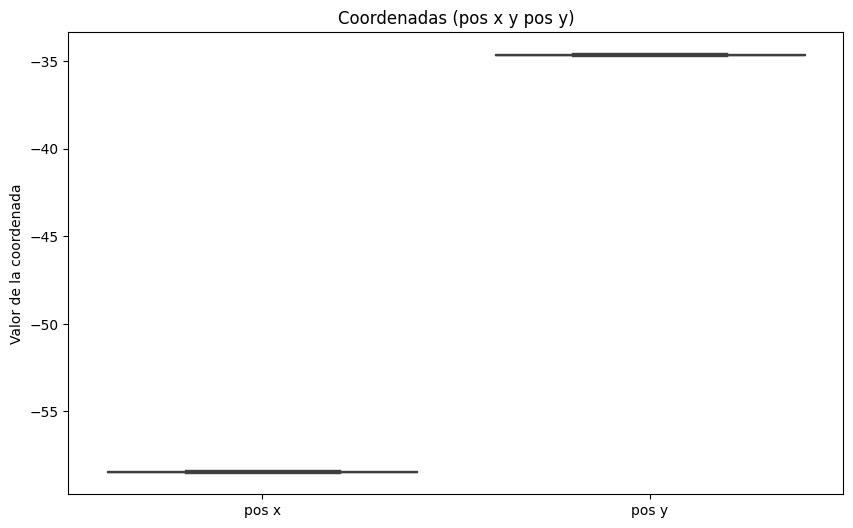

In [364]:

# Crear un diagrama de cajas para 'pos x' y 'pos y'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['pos x', 'pos y']])

# Etiquetas y título
plt.title('Coordenadas (pos x y pos y)')
plt.ylabel('Valor de la coordenada')

# Mostrar el gráfico
plt.show()

¡Y listo, ya hemos realizado la limpieza de nuestro set de datos!

Originalmente tenía 696 registros y 21 columnas. El dataset resultante tiene 504 filas (191 menos) y 20 columnas.

El set de datos ya está listo para el Análisis Exploratorio.

In [365]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 0 to 693
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     504 non-null    object        
 1   N_VICTIMAS             504 non-null    int64         
 2   FECHA                  504 non-null    datetime64[ns]
 3   AAAA                   504 non-null    int64         
 4   MM                     504 non-null    int64         
 5   DD                     504 non-null    int64         
 6   HORA                   504 non-null    object        
 7   HH                     504 non-null    int64         
 8   LUGAR_DEL_HECHO        504 non-null    object        
 9   TIPO_DE_CALLE          504 non-null    object        
 10  Dirección Normalizada  504 non-null    object        
 11  COMUNA                 504 non-null    int64         
 12  pos x                  504 non-null    float64       
 13  pos y     

In [367]:
data.to_excel('homicidios_listo.xlsx', index=False)